In [150]:
import pandas as pd
pd.set_option('display.max_rows', None)
# from nltk.tokenize import word_tokenize
import json
import string
import math

import time
from tqdm import tqdm

In [176]:
df_1 = pd.read_csv("Dataset/result-rach.csv")
# df_1

In [177]:
df_2 = pd.read_csv("Dataset/result-jek.csv")
# df_2

In [182]:
df = df_1.append(df_2, ignore_index=True)
# df
len(df)

860

### Convert the dataset format to become more readable(?) using IOB format label.

In [143]:
print("Review Text:", df.text[217])
print()

print("Label: ", df.label[217])
print()

Review Text: suatu waktu kangen cita rasa oriental dan teringat penuturan kolega saya jaman kuliah dulu bahwa eastern menawarkan sajian oriental dengan cita rasa yang cukup menjanjikan. tadinya mau pesan yang ayce tapi ternyata pada hari-hari tertentu eastern tidak menyajikan ayce. kebetulan kunjungan perdana saya adalah hari dimana rumah makan ini tidak menyajikan ayce.  f&b review: - mie goreng hk: great! recommended! - nasi goreng yancao: great! recommended! - cumi telor asin: great! recommended! - tahu cabe garam: standard, but recommended untuk dimsum: - lumpia udang kulit tahu: great! recommended! - lumpia eastern: great! recommended! - pangsit udang mayones: great! recommended! - lumpia asam manis: standard, but recommended! semua yang saya pesan enak-enak banget, kecuali tahu cabe garam yang agak biasa aja menurut saya. porsinya pun tidak main-main: gede dan dijamin kenyang. kalau tahu porsinya gede saya gak akan pesen ukuran large untuk diri sendiri. ragam pilihan dimsum goren

In [144]:
text_aspect = [['START', 'START']]
for i in contoh:
    text_split = i["text"].translate({ord(i): None for i in string.punctuation}).split(" ")
    for j in range (len(text_split)):
        if j == 0:
            text_aspect.append([text_split[j], "B-" + i["labels"][1].upper()])
        else:
            text_aspect.append([text_split[j], "I-" + i["labels"][1].upper()])
text_aspect.append(['END', 'END'])

text_aspect = [x for x in text_aspect if not x[0] == '']
print("Tokenized Text with Aspect:")
print(text_aspect)
print()

splitted = ['START']
splitted = splitted + df.text[217].translate({ord(i): None for i in string.punctuation}).split(" ")
splitted.append('END')
splitted = [x for x in splitted if not x == '']

print("Splitted Word")
print(splitted)

paired = []
for i in range(1,len(splitted)-1):
    found = False
    for t in range(1,len(text_aspect)-1):
        # print(splitted[i], " - ", text_aspect[t][0])
        if splitted[i] == text_aspect[t][0]:
            # print("BINGO!!!")
            if (splitted[i+1] == text_aspect[t+1][0]) or (splitted[i-1] == text_aspect[t-1][0]):
                found = True
                paired.append([splitted[i],text_aspect[t][1]])
                # text_aspect.pop(1)
                break
    if not found:
        paired.append([splitted[i],'O'])
         
# print("Tokenized Review with Aspect Token")
# print(paired)

Tokenized Text with Aspect:
[['START', 'START'], ['mie', 'B-FOOD'], ['goreng', 'I-FOOD'], ['hk', 'I-FOOD'], ['great', 'I-FOOD'], ['recommended', 'I-FOOD'], ['nasi', 'B-FOOD'], ['goreng', 'I-FOOD'], ['yancao', 'I-FOOD'], ['great', 'I-FOOD'], ['recommended', 'I-FOOD'], ['cumi', 'B-FOOD'], ['telor', 'I-FOOD'], ['asin', 'I-FOOD'], ['great', 'I-FOOD'], ['recommended', 'I-FOOD'], ['lumpia', 'B-FOOD'], ['udang', 'I-FOOD'], ['kulit', 'I-FOOD'], ['tahu', 'I-FOOD'], ['great', 'I-FOOD'], ['recommended', 'I-FOOD'], ['lumpia', 'B-FOOD'], ['eastern', 'I-FOOD'], ['great', 'I-FOOD'], ['recommended', 'I-FOOD'], ['pangsit', 'B-FOOD'], ['udang', 'I-FOOD'], ['mayones', 'I-FOOD'], ['great', 'I-FOOD'], ['recommended', 'I-FOOD'], ['semua', 'B-FOOD'], ['yang', 'I-FOOD'], ['saya', 'I-FOOD'], ['pesan', 'I-FOOD'], ['enakenak', 'I-FOOD'], ['banget', 'I-FOOD'], ['porsinya', 'B-FOOD'], ['pun', 'I-FOOD'], ['tidak', 'I-FOOD'], ['mainmain', 'I-FOOD'], ['gede', 'I-FOOD'], ['dan', 'I-FOOD'], ['dijamin', 'I-FOOD'], ['ken

In [145]:
df_217 = pd.DataFrame(columns=["Word", "Tag"], data=paired)
df_217

,Word,Tag
0,suatu,O
1,waktu,O
2,kangen,O
3,cita,O
4,rasa,O
5,oriental,O
6,dan,O
7,teringat,O
8,penuturan,O
9,kolega,O


In [146]:
def isNaN(num):
    return num != num

In [185]:
new_df = pd.DataFrame()

# for index, row in tqdm(df.iterrows(), desc="Loading..."):
for index, row in df.iterrows():
    # print(index)
    kalimat = index+1
    text_aspect = [['START', 'START']]
    if not isNaN(row["label"]):
        for i in json.loads(row["label"]):
            text_split = i["text"].translate({ord(i): None for i in string.punctuation}).split(" ")
            for j in range (len(text_split)):
                if j == 0:
                    text_aspect.append([text_split[j], "B-" + i["labels"][1].upper()])
                else:
                    text_aspect.append([text_split[j], "I-" + i["labels"][1].upper()])
        text_aspect.append(['END', 'END'])
        text_aspect = [x for x in text_aspect if not x[0] == '']

    splitted = ['START']
    splitted = splitted + row["text"].translate({ord(i): None for i in string.punctuation}).split(" ")
    splitted.append('END')
    splitted = [x for x in splitted if not x == '']

    paired = []
    for i in range(1,len(splitted)-1):
        found = False
        for t in range(1,len(text_aspect)-1):
            # print(splitted[i], " - ", text_aspect[t][0])
            if splitted[i] == text_aspect[t][0]:
                # print("BINGO!!!")
                if (splitted[i+1] == text_aspect[t+1][0]) or (splitted[i-1] == text_aspect[t-1][0]):
                    found = True
                    paired.append([index,splitted[i],text_aspect[t][1]])
                    # text_aspect.pop(1)
                    break
        if not found:
            paired.append([index,splitted[i],'O'])   
            
    df_temp = pd.concat([pd.DataFrame([i], columns=['Kalimat #', 'Word', 'Tag']) for i in paired], ignore_index=True)
    new_df = new_df.append(df_temp, ignore_index=True)




Loading...: 0it [00:00, ?it/s]


Loading...: 2it [00:00, 16.26it/s]


Loading...: 4it [00:00, 15.72it/s]


Loading...: 8it [00:00, 18.87it/s]


Loading...: 11it [00:00, 20.88it/s]


Loading...: 14it [00:00, 18.47it/s]


Loading...: 18it [00:00, 21.64it/s]


Loading...: 23it [00:00, 24.22it/s]


Loading...: 28it [00:01, 27.42it/s]


Loading...: 33it [00:01, 24.53it/s]


Loading...: 36it [00:01, 22.81it/s]


Loading...: 39it [00:01, 17.40it/s]


Loading...: 42it [00:01, 17.26it/s]


Loading...: 44it [00:02, 15.17it/s]


Loading...: 47it [00:02, 17.81it/s]


Loading...: 50it [00:02, 19.27it/s]


Loading...: 53it [00:02, 17.23it/s]


Loading...: 56it [00:02, 19.26it/s]


Loading...: 61it [00:02, 22.93it/s]


Loading...: 64it [00:02, 22.26it/s]


Loading...: 67it [00:03, 24.13it/s]


Loading...: 70it [00:03, 25.31it/s]


Loading...: 75it [00:03, 27.50it/s]


Loading...: 78it [00:03, 18.00it/s]


Loading...: 88it [00:03, 23.74it/s]


Loading...: 95it [00:03, 29.13it/s]


Loading...: 101it

Loading...: 664it [00:26, 28.84it/s]


Loading...: 668it [00:26, 27.12it/s]


Loading...: 673it [00:27, 30.02it/s]


Loading...: 677it [00:27, 24.34it/s]


Loading...: 680it [00:27, 25.15it/s]


Loading...: 683it [00:27, 24.49it/s]


Loading...: 686it [00:27, 24.64it/s]


Loading...: 689it [00:27, 21.92it/s]


Loading...: 692it [00:27, 21.49it/s]


Loading...: 695it [00:28, 22.29it/s]


Loading...: 698it [00:28, 19.84it/s]


Loading...: 701it [00:28, 19.35it/s]


Loading...: 704it [00:28, 19.13it/s]


Loading...: 707it [00:28, 16.45it/s]


Loading...: 709it [00:28, 17.29it/s]


Loading...: 712it [00:29, 19.31it/s]


Loading...: 715it [00:29, 21.25it/s]


Loading...: 719it [00:29, 24.14it/s]


Loading...: 724it [00:29, 27.68it/s]


Loading...: 729it [00:29, 29.21it/s]


Loading...: 733it [00:29, 24.49it/s]


Loading...: 736it [00:29, 23.59it/s]


Loading...: 739it [00:30, 22.04it/s]


Loading...: 742it [00:30, 23.44it/s]


Loading...: 746it [00:30, 25.15it/s]


Loading...: 751it [00:30,

In [187]:
len(new_df)

50536

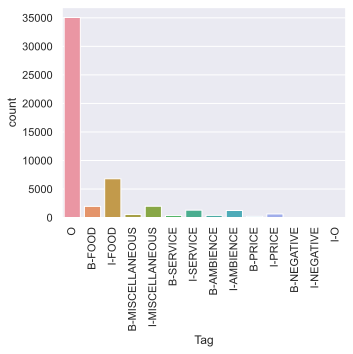

In [188]:
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(5, 5))
ax = sns.countplot('Tag', data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

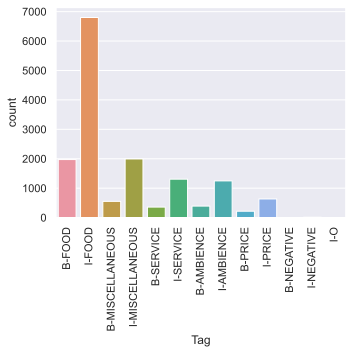

In [189]:
plt.figure(figsize=(5, 5))
ax = sns.countplot('Tag', data=new_df.loc[new_df['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [204]:
new_df = new_df.replace({'Tag' : { 'B-NEGATIVE' : 'O', 'I-NEGATIVE' : 'O', 'I-O' : 'O'}})

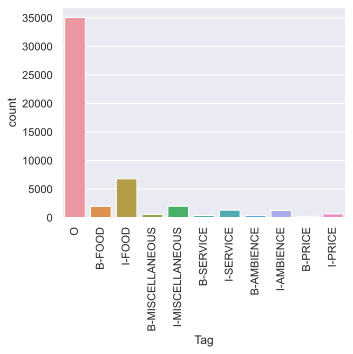

In [205]:
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.figure(figsize=(5, 5))
ax = sns.countplot('Tag', data=new_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

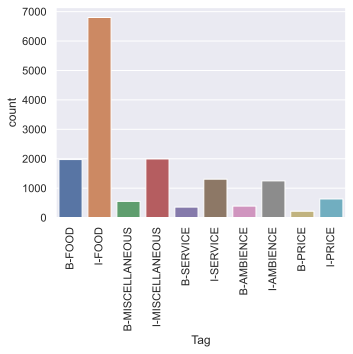

In [206]:
plt.figure(figsize=(5, 5))
ax = sns.countplot('Tag', data=new_df.loc[new_df['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

In [207]:
new_df.to_csv(r'Dataset\dataset_fix.csv', index = False)